In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [15]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, input_dim=16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
#model.add(layers.Dense(4, activation='relu'))
#model.add(layers.Dense(2, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [16]:
model.summary()
print(model.trainable_variables) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________
[<tf.Variable 'dense_4/kernel:0' shape=(16, 32) dtype=float32, numpy=
array([[ 0.2813045 , -0.2842938 ,  0.18177441,  0.05057764, -0.27769345,
        -0.35069475,  0.1210143 , -0.3049992 , -0.3371494 , -0.13823897,
         0.28292707,  0.23371366, 

In [17]:
model.compile(loss='MSE', optimizer=tf.keras.optimizers.SGD(0.00001), metrics=['accuracy'])

In [18]:
data = pd.read_csv('energy_efficiency_data.csv')
heating = data.pop('Heating Load')
cooling = data.pop('Cooling Load')
Orient = pd.get_dummies(data['Orientation'])
Glazing = pd.get_dummies(data['Glazing Area Distribution'])
data = pd.concat([data,pd.get_dummies(data['Orientation'], prefix='Orientation')],axis=1)
data = pd.concat([data,pd.get_dummies(data['Glazing Area Distribution'], prefix='Glazing Area Distribution')],axis=1)
data.drop(['Orientation'],axis=1, inplace=True)
data.drop(['Glazing Area Distribution'],axis=1, inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, heating, test_size=0.25, random_state=42)

In [20]:
model.fit(X_train.to_numpy(), y_train.to_numpy(),batch_size=16, epochs=200)

Epoch 1/200
36/36 [==============================] - 0s 417us/step - loss: 1501.1722 - accuracy: 0.0000e+00
Epoch 2/200
36/36 [==============================] - 0s 389us/step - loss: 150.0493 - accuracy: 0.0000e+00
Epoch 3/200
36/36 [==============================] - 0s 417us/step - loss: 146.8651 - accuracy: 0.0000e+00
Epoch 4/200
36/36 [==============================] - 0s 389us/step - loss: 134.3696 - accuracy: 0.0000e+00
Epoch 5/200
36/36 [==============================] - 0s 389us/step - loss: 133.6056 - accuracy: 0.0000e+00
Epoch 6/200
36/36 [==============================] - 0s 361us/step - loss: 127.7023 - accuracy: 0.0000e+00
Epoch 7/200
36/36 [==============================] - 0s 361us/step - loss: 123.0375 - accuracy: 0.0000e+00
Epoch 8/200
36/36 [==============================] - 0s 389us/step - loss: 123.6608 - accuracy: 0.0000e+00
Epoch 9/200
36/36 [==============================] - 0s 389us/step - loss: 115.5161 - accuracy: 0.0000e+00
Epoch 10/200
36/36 [================

36/36 [==============================] - 0s 361us/step - loss: 29.5637 - accuracy: 0.0000e+00
Epoch 78/200
36/36 [==============================] - 0s 389us/step - loss: 29.4547 - accuracy: 0.0000e+00
Epoch 79/200
36/36 [==============================] - 0s 389us/step - loss: 29.7407 - accuracy: 0.0000e+00
Epoch 80/200
36/36 [==============================] - 0s 389us/step - loss: 28.8449 - accuracy: 0.0000e+00
Epoch 81/200
36/36 [==============================] - 0s 361us/step - loss: 30.4782 - accuracy: 0.0000e+00
Epoch 82/200
36/36 [==============================] - 0s 389us/step - loss: 29.3093 - accuracy: 0.0000e+00
Epoch 83/200
36/36 [==============================] - 0s 389us/step - loss: 28.8605 - accuracy: 0.0000e+00
Epoch 84/200
36/36 [==============================] - 0s 361us/step - loss: 29.1385 - accuracy: 0.0000e+00
Epoch 85/200
36/36 [==============================] - 0s 361us/step - loss: 30.1269 - accuracy: 0.0000e+00
Epoch 86/200
36/36 [==============================

36/36 [==============================] - 0s 361us/step - loss: 22.2831 - accuracy: 0.0000e+00
Epoch 154/200
36/36 [==============================] - 0s 389us/step - loss: 21.6240 - accuracy: 0.0000e+00
Epoch 155/200
36/36 [==============================] - 0s 361us/step - loss: 22.5450 - accuracy: 0.0000e+00
Epoch 156/200
36/36 [==============================] - 0s 361us/step - loss: 22.6899 - accuracy: 0.0000e+00
Epoch 157/200
36/36 [==============================] - 0s 361us/step - loss: 22.1178 - accuracy: 0.0000e+00
Epoch 158/200
36/36 [==============================] - 0s 389us/step - loss: 24.2817 - accuracy: 0.0000e+00
Epoch 159/200
36/36 [==============================] - 0s 361us/step - loss: 21.7795 - accuracy: 0.0000e+00
Epoch 160/200
36/36 [==============================] - 0s 361us/step - loss: 23.7964 - accuracy: 0.0000e+00
Epoch 161/200
36/36 [==============================] - 0s 361us/step - loss: 22.8099 - accuracy: 0.0000e+00
Epoch 162/200
36/36 [=====================

In [21]:
answer = model.predict(X_test.to_numpy())

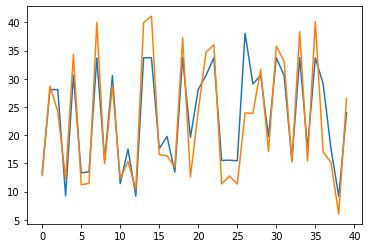

In [23]:
import matplotlib.pyplot as plt
t = range(len(answer))
plt.plot(t[:40],answer[:40])
plt.plot(t[:40],y_test[:40])

In [24]:
print(model.trainable_variables) 

[<tf.Variable 'dense_4/kernel:0' shape=(16, 32) dtype=float32, numpy=
array([[ 2.84935027e-01, -2.82234102e-01,  1.81774408e-01,
         5.05776405e-02, -2.77960122e-01, -3.50694746e-01,
         1.17066644e-01, -3.04999202e-01, -3.37589949e-01,
        -1.38875335e-01,  2.82927066e-01,  2.28652656e-01,
         3.11567187e-02, -1.44376308e-01,  9.46471393e-02,
        -2.63340585e-02,  1.85964435e-01,  1.85235441e-02,
        -1.40414998e-01, -1.15557954e-01, -3.45598459e-01,
        -2.15002686e-01, -1.81837395e-01,  1.51923761e-01,
         1.57459468e-01,  1.85827225e-01, -5.49992025e-02,
         8.54068995e-02, -2.69004464e-01, -2.98272818e-01,
        -3.05246472e-01, -1.42478764e-01],
       [ 1.27341777e-01,  1.41199064e-02,  5.97954988e-02,
        -4.91865575e-02,  9.11678970e-02, -3.09604943e-01,
         1.72519773e-01, -4.10079956e-03, -2.09650695e-01,
        -1.92189425e-01, -3.22020799e-01,  1.62892133e-01,
        -1.89835310e-01,  3.46954465e-02,  7.26931095e-02,
  